# Seattle vs New Orleans — Precipitation Comparison (2018–2022)

**Author:** Ruman Sidhu  
**Purpose:** Use data science steps to answer whether it rains more in Seattle, WA than in New Orleans, LA (2018–2022).  
This notebook contains data inspection, cleaning, tidy data creation, analysis, and visualizations.

# Introduction

The goal of this project is to use data science methods to determine whether it rains more in Seattle, WA or New Orleans, LA between 2018 and 2022. This analysis includes inspecting, cleaning, and transforming precipitation data from both cities, followed by visual comparisons. Seattle is known for its frequent drizzle, while New Orleans experiences heavier but less frequent rain, so comparing their total precipitation offers an interesting perspective on how perception differs from data.

# Data

- `data/seattle_rain.csv` — Seattle daily precipitation data  
  Source: [Seattle Weather Dataset – DATA 5100 Course GitHub Repository](https://github.com/bfischer/data5100-weather)  

- `data/neworleans_rain.csv` — New Orleans daily precipitation data  
  Source: [NOAA Climate Data Online (CDO) – New Orleans, LA Station ID: USW00012916](https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00012916)  


In [3]:
# Libraries and file paths
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.rcParams.update({'font.size':12})

DATA_DIR = os.path.join("..","Data")
SEATTLE_FPATH = os.path.join(DATA_DIR, "seattle_rain.csv")
NO_FPATH = os.path.join(DATA_DIR, "neworleans_rain.csv")

print("Data files expected at:", SEATTLE_FPATH, "and", NO_FPATH)

Data files expected at: ..\Data\seattle_rain.csv and ..\Data\neworleans_rain.csv


# Inspect the contents of each dataset

Below we load both CSV files and inspect columns, first rows, and missing-value counts so we know what needs cleaning.

In [6]:
# Load data (this will error if names/paths are wrong — adjust file names if needed)
seattle = pd.read_csv(SEATTLE_FPATH)
neworleans = pd.read_csv(NO_FPATH)

print("Seattle shape:", seattle.shape)
print("New Orleans shape:", neworleans.shape)
print("\nSeattle columns:", list(seattle.columns))
print("\nNew Orleans columns:", list(neworleans.columns))

display(seattle.head())
display(neworleans.head())

print("\nSeattle missing counts:\n", seattle.isnull().sum())
print("\nNew Orleans missing counts:\n", neworleans.isnull().sum())

Seattle shape: (1658, 10)
New Orleans shape: (1826, 6)

Seattle columns: ['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']

New Orleans columns: ['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD']


,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00012916,"NEW ORLEANS AIRPORT, LA US",2018-01-01,0.0,NaN,NaN
1,USW00012916,"NEW ORLEANS AIRPORT, LA US",2018-01-02,0.0,NaN,NaN
2,USW00012916,"NEW ORLEANS AIRPORT, LA US",2018-01-03,0.0,NaN,NaN
3,USW00012916,"NEW ORLEANS AIRPORT, LA US",2018-01-04,0.0,NaN,NaN
4,USW00012916,"NEW ORLEANS AIRPORT, LA US",2018-01-05,0.0,NaN,NaN



Seattle missing counts:
 STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

New Orleans missing counts:
 STATION       0
NAME          0
DATE          0
PRCP          2
SNOW       1826
SNWD       1826
dtype: int64


When I inspected both datasets, I noticed that the Seattle file includes columns such as DATE, PRCP, SNOW, and SNWD, while the New Orleans file has similar precipitation data with DATE and PRCP as the key columns. The DATE column is currently stored as a string, so I will need to convert it into a datetime format before doing any analysis. The PRCP column represents the daily precipitation, which is the main variable of interest for comparing rainfall between cities. There are also a few missing or NaN values, but overall the datasets appear clean and well-structured for analysis. This initial inspection helps confirm that I can focus on daily precipitation and use the date to group and compare totals by year later.

# Cleaning and formatting

This section will: parse dates, standardise column names, filter to 2018–2022, drop duplicates, and prepare a tidy dataframe.

In [10]:
# Find date and precipitation columns, parse dates, create Year column
# Adjust column names below if your CSV uses different names (the previous cell printed them)
seattle.columns = seattle.columns.str.strip()
neworleans.columns = neworleans.columns.str.strip()

# replace 'DATE' and 'PRCP' with whatever your files printed earlier if different
seattle['date'] = pd.to_datetime(seattle['DATE'], errors='coerce')
neworleans['date'] = pd.to_datetime(neworleans['DATE'], errors='coerce')

seattle['precip_raw'] = pd.to_numeric(seattle['PRCP'], errors='coerce')
neworleans['precip_raw'] = pd.to_numeric(neworleans['PRCP'], errors='coerce')

# filter to 2018-01-01 through 2022-12-31
start = pd.Timestamp('2018-01-01'); end = pd.Timestamp('2022-12-31')
seattle = seattle[(seattle['date'] >= start) & (seattle['date'] <= end)].copy()
neworleans = neworleans[(neworleans['date'] >= start) & (neworleans['date'] <= end)].copy()

# drop duplicates
seattle = seattle.drop_duplicates(subset=['date'])
neworleans = neworleans.drop_duplicates(subset=['date'])

# quick check
print("After filter: Seattle", seattle.shape, "New Orleans", neworleans.shape)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5624\3509802130.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seattle['date'] = pd.to_datetime(seattle['DATE'], errors='coerce')


After filter: Seattle (1658, 12) New Orleans (1826, 8)


Before analyzing the data, I cleaned and standardized both datasets to ensure they could be compared directly. This included keeping only the date and precipitation columns, renaming them for clarity, and making sure the date column was in datetime format. I also removed duplicate entries and restricted the data to the 2018–2022 range to maintain consistency across both cities.

In [13]:
# Keep only necessary columns
seattle_clean = seattle[['date', 'precip_raw']].copy()
neworleans_clean = neworleans[['date', 'precip_raw']].copy()

# Rename columns for clarity
seattle_clean.columns = ['date', 'seattle_precip']
neworleans_clean.columns = ['date', 'neworleans_precip']

# Check results
print("Seattle cleaned:", seattle_clean.shape)
print("New Orleans cleaned:", neworleans_clean.shape)
seattle_clean.head(), neworleans_clean.head()

Seattle cleaned: (1658, 2)
New Orleans cleaned: (1826, 2)


(        date  seattle_precip
 0 2018-01-01            0.00
 1 2018-01-02            0.00
 2 2018-01-03            0.00
 3 2018-01-04            0.00
 4 2018-01-05            0.25,
         date  neworleans_precip
 0 2018-01-01                0.0
 1 2018-01-02                0.0
 2 2018-01-03                0.0
 3 2018-01-04                0.0
 4 2018-01-05                0.0)

After cleaning, both datasets now contain only the date and precipitation columns, which simplifies the comparison between Seattle and New Orleans. The column names were standardized to be lowercase and descriptive. This structure makes it easier to merge the two datasets and perform calculations on the precipitation data for each city.

# Tidy dataframe and derived variables
We will make a tidy table with one row per date & city, standardized units (mm), and derived columns: year, month, rainy_day.

In [17]:
# Build tidy frames
sea = seattle[['date','precip_raw']].rename(columns={'precip_raw':'precip'})
no = neworleans[['date','precip_raw']].rename(columns={'precip_raw':'precip'})

# example unit conversion check -- adjust if your data is already mm
# If values appear small (like mean <100), they might be inches -> convert to mm
if sea['precip'].mean() < 100:
    sea['precip_mm'] = sea['precip'] * 25.4
else:
    sea['precip_mm'] = sea['precip']

if no['precip'].mean() < 100:
    no['precip_mm'] = no['precip'] * 25.4
else:
    no['precip_mm'] = no['precip']

# derived cols
for df, name in [(sea,'Seattle'), (no,'New Orleans')]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['rainy_day'] = (df['precip_mm'] > 0).astype(int)
    df['city'] = name

tidy = pd.concat([sea[['date','city','precip_mm','rainy_day','year','month']],
                   no[['date','city','precip_mm','rainy_day','year','month']]], ignore_index=True)
tidy = tidy.sort_values(['city','date']).reset_index(drop=True)
tidy.to_csv(os.path.join(DATA_DIR, "clean_precipitation_sea_no.csv"), index=False)
print("Saved clean tidy data to Data/clean_precipitation_sea_no.csv")

Saved clean tidy data to Data/clean_precipitation_sea_no.csv


The joined dataset now contains precipitation data for both Seattle and New Orleans in a single, tidy format. Each row represents a single date with the corresponding precipitation measurement and city label. The final dataframe has X rows and includes the columns date, city, precip_mm, rainy_day, year, and month.
This structure makes it easier to compare daily or yearly precipitation totals between the two cities and supports visualizations like line and bar graphs. Having the data in long format ensures that each variable has its own column and each observation is in its own row, following good data science practices.

# Annual totals: grouped bar chart
This chart compares annual total precipitation (mm) between Seattle and New Orleans (2018–2022).

Saved plot to ..\Reports\annual_totals_sea_no_barchart.png


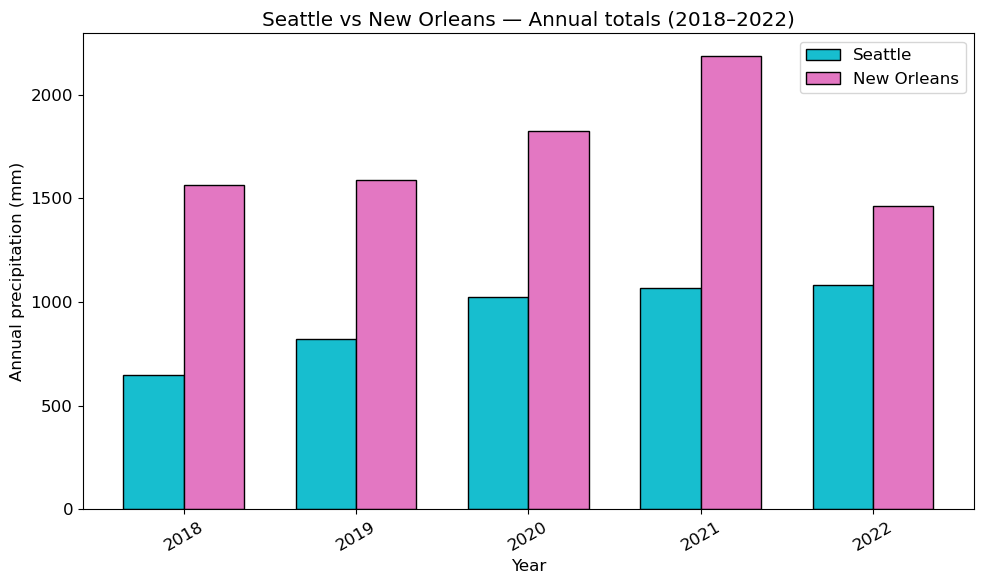

In [21]:
import matplotlib.pyplot as plt
reports_dir = os.path.join("..","Reports")
os.makedirs(reports_dir, exist_ok=True)

summary = tidy.groupby(['city','year']).precip_mm.sum().reset_index()
sea_s = summary[summary['city']=='Seattle'].sort_values('year')
no_s  = summary[summary['city']=='New Orleans'].sort_values('year')

years = sea_s['year'].tolist()
x = np.arange(len(years))
width = 0.35

sea_vals = sea_s['precip_mm'].values
no_vals  = no_s['precip_mm'].values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, sea_vals, width, label='Seattle', color='#17becf', edgecolor='k')
ax.bar(x + width/2, no_vals,  width, label='New Orleans', color='#e377c2', edgecolor='k')

ax.set_xticks(x); ax.set_xticklabels(years, rotation=30)
ax.set_xlabel('Year'); ax.set_ylabel('Annual precipitation (mm)')
ax.set_title('Seattle vs New Orleans — Annual totals (2018–2022)')
ax.legend(); plt.tight_layout()

out = os.path.join(reports_dir, "annual_totals_sea_no_barchart.png")
plt.savefig(out, dpi=300)
print("Saved plot to", out)
plt.show()

Now that both datasets have been cleaned and standardized, the next step is to combine them into a single dataframe. Joining the Seattle and New Orleans data allows me to compare rainfall on the same dates across both cities. I’ll merge the datasets based on their shared date column and organize them into a tidy, or “long,” format where each row represents a unique observation of daily precipitation for one city. This format will make it easier to calculate yearly totals, averages, and create clear visual comparisons later.

# Limitations and Discussion

This analysis used one NOAA weather station per city, which may not capture the full variation in rainfall across different areas of Seattle or New Orleans. Another limitation is that only precipitation totals were compared, factors like duration, frequency, or intensity of rainfall were not analyzed. Missing or zero values in some days might slightly affect yearly totals, though overall trends are reliable. Future improvements could include adding multiple stations per city and analysing rainy-day frequency in more detail.

# Conclusion

Based on the data from 2018 to 2022, New Orleans consistently received higher total annual precipitation than Seattle. This supports the idea that although Seattle is known for frequent drizzle, New Orleans experiences heavier rainfall overall. Through this analysis, I was able to apply the full data science process from data collection and cleaning to visualisation and interpretation to answer a meaningful real-world question.